### Análisis exploratorio de datos

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('ggplot')

# Colores Bitcoin
# ==============================================================================
palette_btc = {'naranja': '#f7931a',
               'blanco' : '#ffffff',
               'gris'   : '#4d4d4d',
               'azul'   : '#0d579b',
               'verde'  : '#329239'
              }

In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_val_score, RepeatedKFold,RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt # Matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import operator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearnex import patch_sklearn
from sklearn.ensemble import HistGradientBoostingClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
#Importamos el VotingClssifier de sklearn para observar si los resultados mejoran
from sklearn.ensemble import VotingClassifier

patch_sklearn()
#from Funciones import *

%matplotlib inline


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
import eikon as ek

In [6]:
#App Key Eikon
ek.set_app_key('ea2407bc161b47a7918dccd7d7871eb0ba33bd30')

2022-10-18 07:15:37,375 P[30284] [MainThread 15292] Error: no proxy address identified.
Check if Eikon Desktop or Eikon API Proxy is running.
2022-10-18 07:15:37,375 P[30284] [MainThread 15292] Error on handshake url http://127.0.0.1:None/api/handshake : UnsupportedProtocol("Request URL is missing an 'http://' or 'https://' protocol.")
2022-10-18 07:15:37,375 P[30284] [MainThread 15292] Error on handshake url http://127.0.0.1:None/api/handshake : UnsupportedProtocol("Request URL is missing an 'http://' or 'https://' protocol.")
2022-10-18 07:15:37,375 P[30284] [MainThread 15292] Port number was not identified, cannot send any request


In [4]:
base=pd.read_excel("arb.xlsx")

In [7]:
base.columns

Index(['Unnamed: 0', 'Date', 'Hora_COL', 'Minuto', 'Hora_NY', 'Festivo_COL',
       'Festivo_NYSE', 'Next_Day', 'Subasta', 'PFB_ABIERTO', 'CIB_ABIERTO',
       'CIB_close', 'COP_close', 'PFB_close', 'SPX_close', 'tasa_cambio',
       'USD_BID', 'USD_ASK', 'ASK_CIB', 'BID_CIB', 'ASK_PFB', 'BID_PFB',
       'Spread_BE_SL', 'Spread_BL_SE', 'Arbitraje_BE_SL', 'Arbitraje_BL_SE'],
      dtype='object')

In [15]:
columnas_precio=['CIB_close', 'COP_close', 'PFB_close', 'SPX_close', 'tasa_cambio',
       'USD_BID', 'USD_ASK', 'ASK_CIB', 'BID_CIB', 'ASK_PFB', 'BID_PFB']
columnas_spread=['Spread_BE_SL', 'Spread_BL_SE']

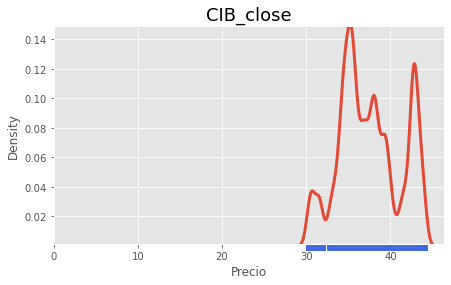

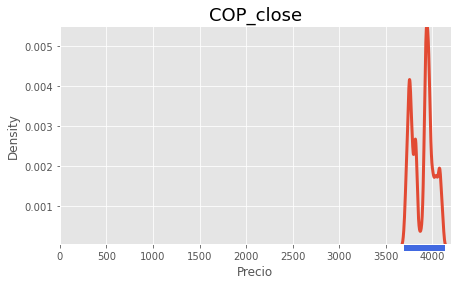

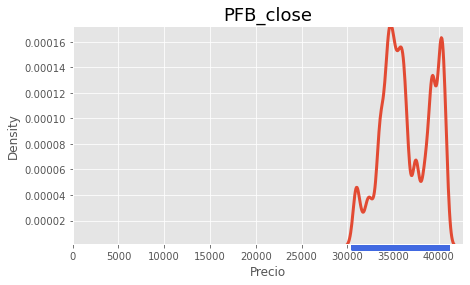

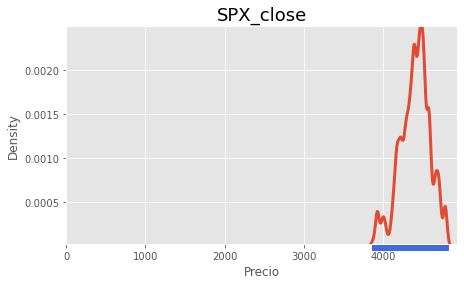

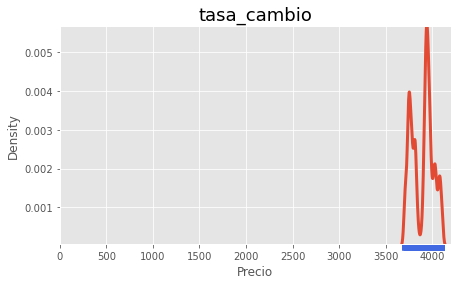

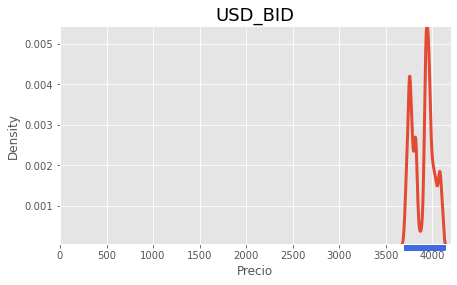

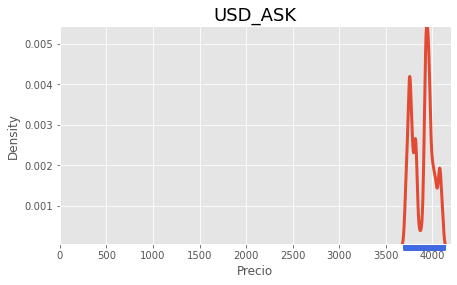

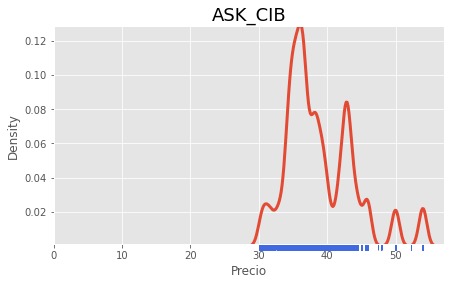

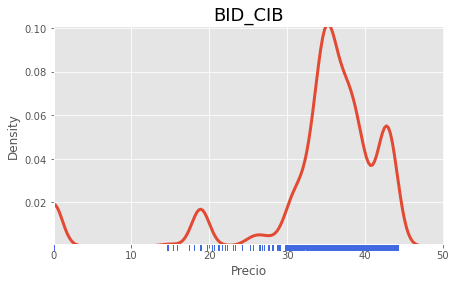

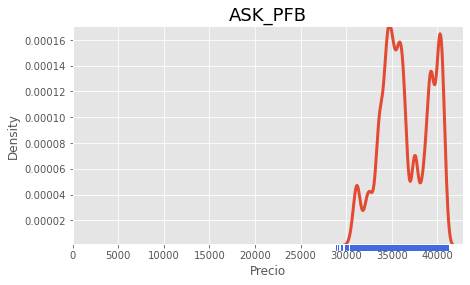

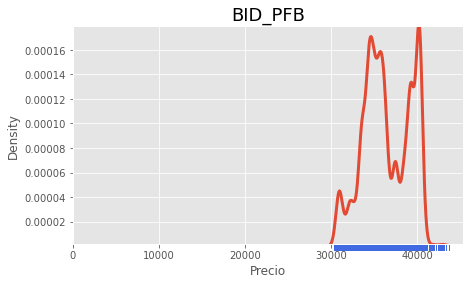

In [16]:
for columna in columnas_precio:
    fig, ax = plt.subplots(figsize=(7, 4))
    p = sns.kdeplot(data=base, x=columna, linewidth=3, ax=ax)
    r = sns.rugplot(data=base, x=columna, ax=ax, c='royalblue',
                    height=-.03, clip_on=False)
    p.set(xlim=(0, None))
    p.set_title(columna, fontsize=18)
    p.set_xlabel('Precio');

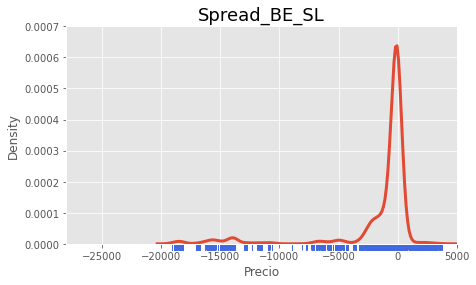

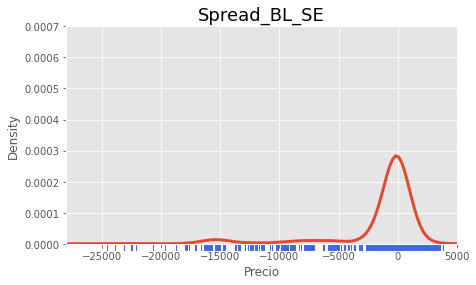

In [26]:
for columna in columnas_spread:
    fig, ax = plt.subplots(figsize=(7, 4))
    p = sns.kdeplot(data=base, x=columna, linewidth=3, ax=ax)
    r = sns.rugplot(data=base, x=columna, ax=ax, c='royalblue',
                    height=-.03, clip_on=False)
    p.set(xlim=(-28000, 5000))
    p.set(ylim=(0, 0.0007))
    
    p.set_title(columna, fontsize=18)
    p.set_xlabel('Precio');

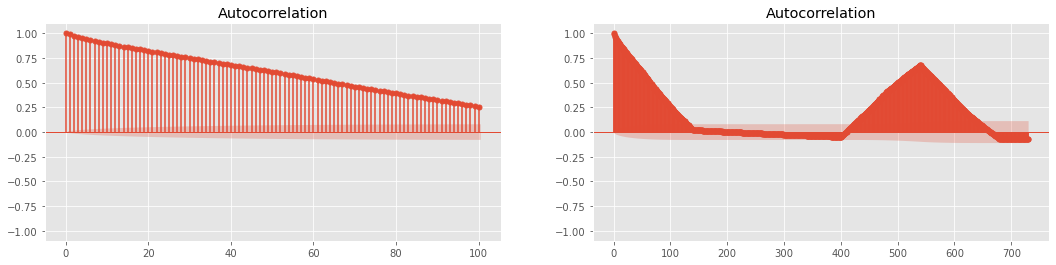

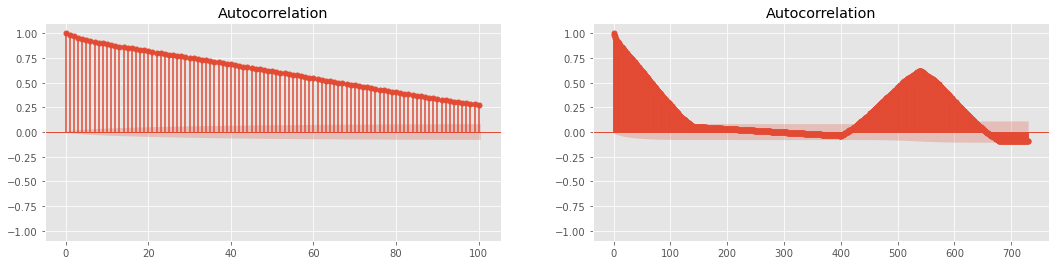

In [30]:
for columna in columnas_spread:    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
    axes = axes.flat
    plot_acf(base[columna], ax=axes[0], linewidth = 1, lags=100)
    axes[0].set_ylim(-1.1, 1.1)
    plot_acf(base[columna], ax=axes[1], linewidth = 1, lags=730)
    axes[1].set_ylim(-1.1, 1.1)
    plt.show();

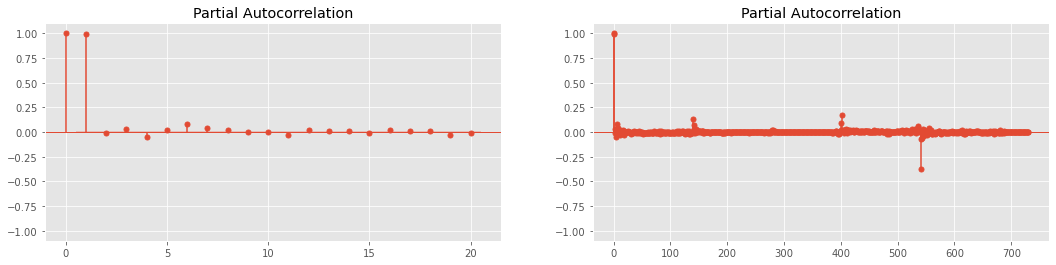

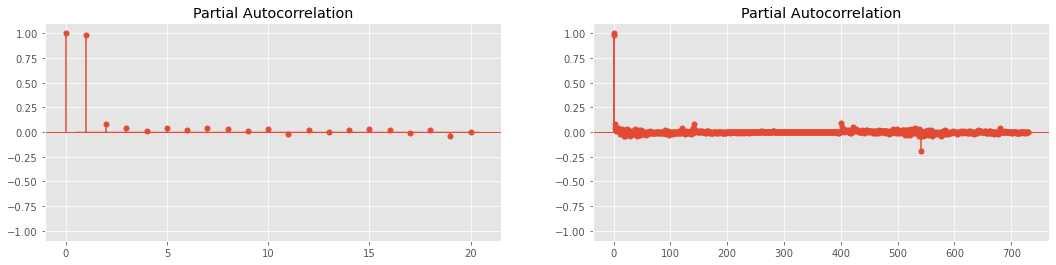

In [31]:
for columna in columnas_spread:     
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
    axes = axes.flat
    plot_pacf(base[columna], ax=axes[0], lags=20, method='ywm',  linewidth = 1)
    axes[0].set_ylim(-1.1, 1.1)
    plot_pacf(base[columna], ax=axes[1], lags=730, method='ywm',  linewidth = 1)
    axes[1].set_ylim(-1.1, 1.1)
    plt.show();